# Angers School of AI - Reinforcement Learning

---

You are welcome to read and use this notebook to have a first idea of what is the reinforcement learning and how to use it!

### 1. Reinforcement Learning vs Supervised Learning / Unsupervised Learning

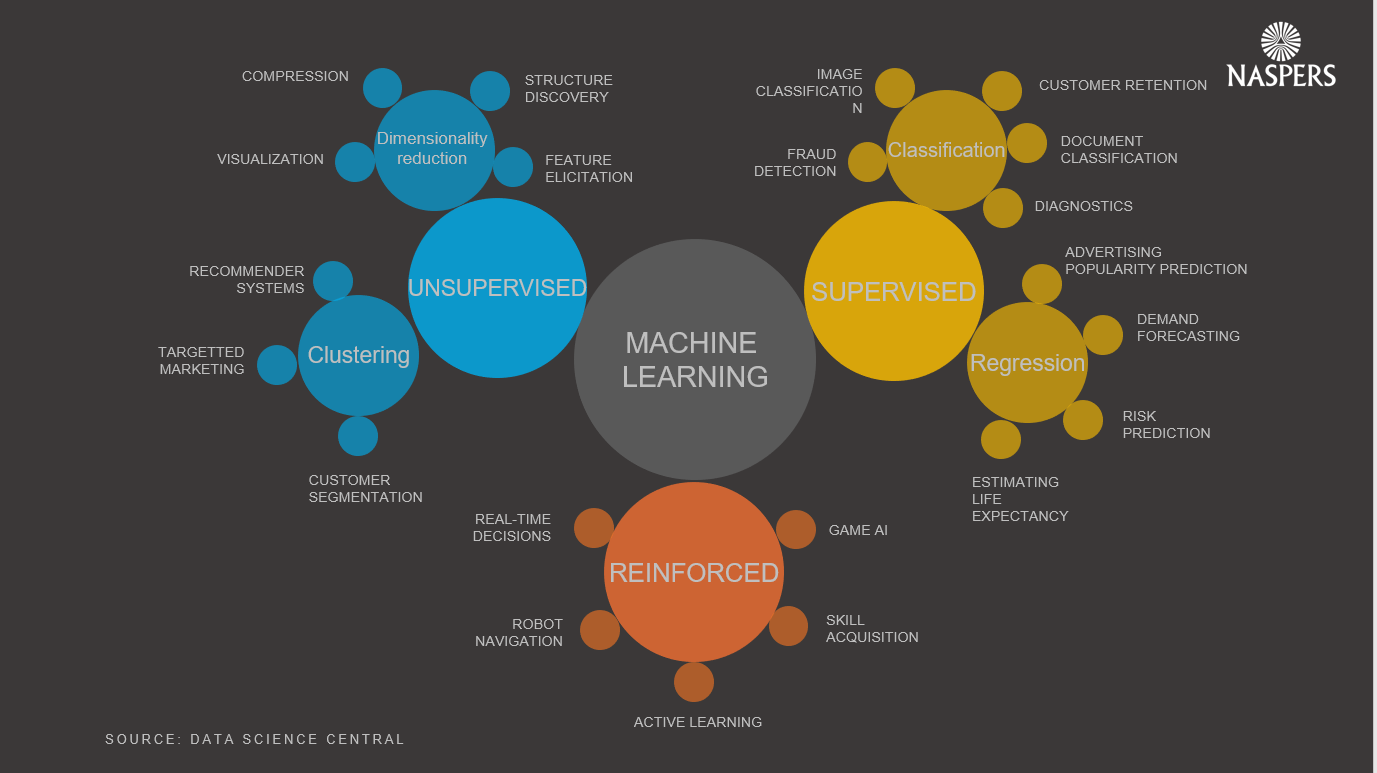


***
## References and Tools

#### Trainee :
> - **Deep Reinforcement Learning Nanodegree** from Udacity. Excellent trainee on Deep Reinforcement Learning

#### Tool :
> - **OpenAI Gym**, an open-source toolkit created by OpenAI for developing and comparing reinforcement learning (RL) algorithms 

#### Sheet :
> - **https://github.com/udacity/deep-reinforcement-learning/blob/master/cheatsheet/cheatsheet.pdf**. It contains Reinforcement Learning algorithms.

#### Books :
> - **Reinforcement Learning: An Introduction** by Richard S. Sutton and Andrew G. Barto. This book is a classic text with an excellent introduction to reinforcement learning fundamentals
> - **Grokking Deep Reinforcement Learning** by Miguel Morales.

***
## An example of reinforcement learning : Playing Quarto
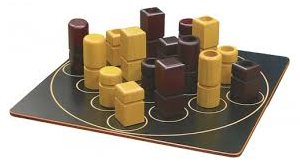

#### Game rules :
> - **4*4 board**
> - **16 different pieces** either tall or short, black or white, hollow top or solid top, square or circular
> - **Start the game** : the first player select a piece that the second player must place on the board.
> - **Next steps** : Then the second player select one of the remaining pieces that the first player must place on the board and so on...
> - **Who win ?** : A player wins by placing a piece on the board which forms a horizontal, vertical, or diagonal row of four pieces, all of which have **at least one** common attribute (all short, all circular, etc...)

***
## Main concepts of the reinforcement learning
> - The environnement : it defines a world where an agent is able to interact with.
> - The agent : he needs to learn how to achieve goals by interacting with the environment
> - A state : it's like a picture of the environment.
> - A reward : it's the feedback given by the environment when the agent decide to execute an action.

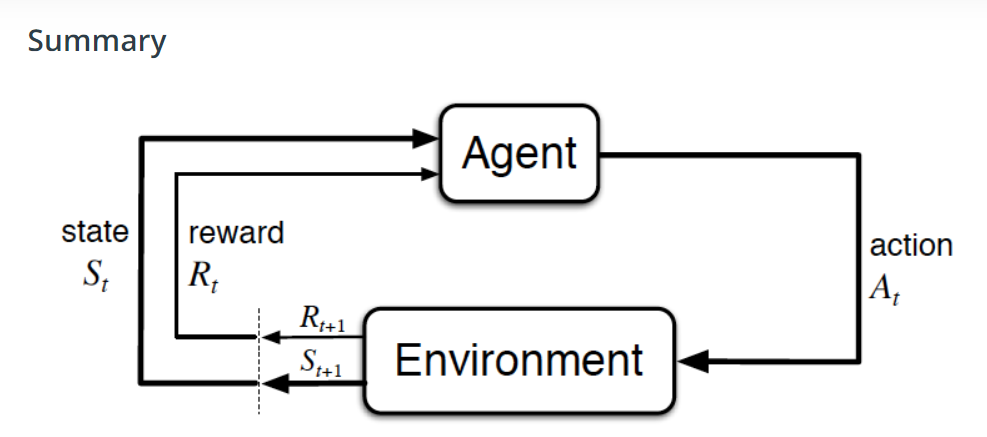

                                                    (Source: Sutton and Barto, 2017) 

At a given state, the agent interacts with the environment by executing a possible action. Then the environment informs the agent of the new state after having applied this action and give the corresponding reward of this change.

#### Quarto example :
> - **our environment** contains :
> > - 16 pieces (with a number to each of them from 0 to 15)
> > - the board_state : an array of 17 cells. Cells 0 to 15 represent the board and cell 16 correspond to the selected piece from the previous player. This piece is not already on the board.
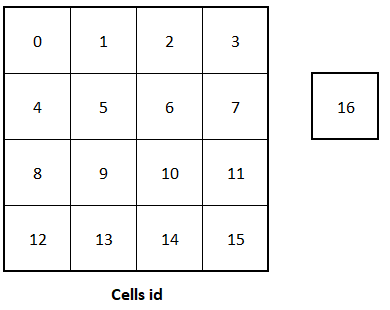
> > each cell contains the number of the piece positioned on it, -1 if empty
> > - The action space (list of possible actions)
> > - The list of empty positions on the board
> > - The list of remaining pieces not selected by a player.
> - **an agent** has the role of one of the two players. Either he will start the game or play second.
> - **a state** is a board_state of the environment
> - **reward** : **0** if the action doesn't lead to the end of the game, **100** if the agent win the game after his action, **-100** if the agent lose after the next action of his opponent. In case of draw result, the reward is equal to 0
> - **an action** is in reality a couple of actions. The first one defines where to position the piece given by the opponent. The second one define the piece that the agent will give to the opponent. In our environment, the couple is transformed in an integer between 0 and 256.

## Remarks
In this presentation, we focus on a **fully observable environment** ( on the opposit of a partial observable environment like self driving car). We also have a **deterministic transition** means that applying an action to a specific state will always result to the same new state. We have a **finite list of action**. Finally we are in an **episodic tasks** problem (means that we have a well-defined starting and ending point - **terminal state**) in opposition of **continuous tasks** like self-driving car.

---
(Source: https://joshgreaves.com/reinforcement-learning/understanding-rl-the-bellman-equations/)

## Reward and Return
RL agents learn to maximize cumulative future reward. The word used to describe cumulative future reward is return and is often denoted with R. We also use a subscript t to give the return from a certain time step. In mathematical notation, it looks like this:
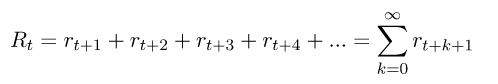

More common than using future cumulative reward as return is using future cumulative discounted reward:
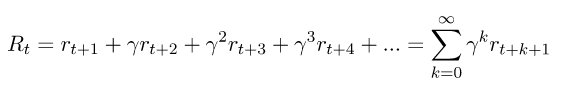
where 0 < \gamma < 1. The two benefits of defining return this way is that the return is well defined for infinite series, and that it gives a greater weight to sooner rewards, meaning that we care more about imminent rewards and less about rewards we will receive further in the future. The smaller the value we select for \gamma the more true this is. This can be seen in the special cases where we let \gamma equal 0 or 1. If \gamma is 1, we arrive back at our first equation where we care about all rewards equally, not matter how far into the future they are. On the other hand, when \gamma is 0 we care only about the immediate reward, and do not care about any reward after that. This would lead our algorithm to be extremely short-sighted. It would learn to take the action that is best for that moment, but won’t take into account the effects that action will have on its future.

> **Example:**
> 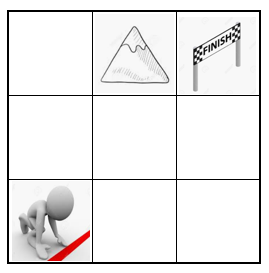
> Rewards :
> - -1 for each move
> - -3 for the mountain
> - 10 for achieving the goal

## Policy
A policy defines for each state of the environment the action to choose. The objective of reinforcement learning is to find the best policy for our agent in order to maximize the cumulative rewards. Sometimes it may be better to sacrifice immediate reward (reward at time step Rₜ) to gain more long-term reward.

To learn the optimal policy, we make use of value functions. There are two types of value functions that are used in reinforcement learning: the state value function, denoted V(s), and the action value function, denoted Q(s, a).

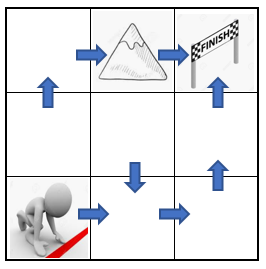

## State Value Function

The state value function describes the value of a state when following a policy. It is the expected return when starting from state s acting according to our policy π:
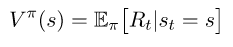
It is important to note that even for the same environment **the value function changes depending on the policy**. This is because the value of the state changes depending on how you act, since the way that you act in that particular state affects how much reward you expect to see. Also note the importance of the expectation. (As a refresher, an expectation is much like a mean; it is literally what return you expect to see.) The reason we use an expectation is that there is some randomness in what happens after you arrive at a state. You may have a stochastic policy, which means we need to combine the results of all the different actions that we take. Also, the transition function can be stochastic, meaning that we may not end up in any state with 100% probability. Remember in the example above: when you select an action, the environment returns the next state. There may be multiple states it could return, even given one action. We will see more of this as we look at the Bellman equations. The expectation takes all of this randomness into account.

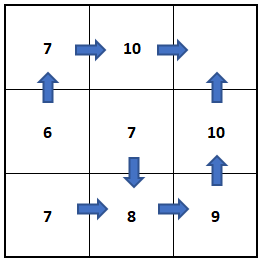 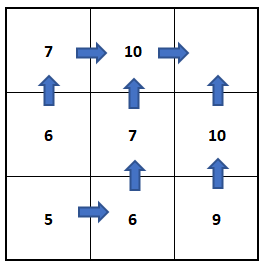


## Optimal Policy
It always exist at least one policy that's better than or equal to all other policies. We call this policy an optimal policy **π***. It's guaranteed to exist but it may not be unique.

All optimal policy has the same value function which is denoted **v***


## Action Value Function
The other value function we will use is the action value function. The action value function tells us the value of taking an action in some state when following a certain policy. It is the expected return given the state and action under π:
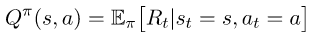
The same notes for the state value function apply to the action value function. The expectation takes into account the randomness in future actions according to the policy, as well as the randomness of the returned state from the environment.
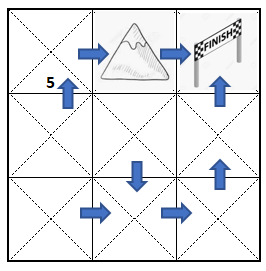

The optimal action value function is denoted **q***

## Bellman Equations
Bellman equation for the state value function:
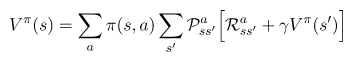

Bellman equation for the action value function
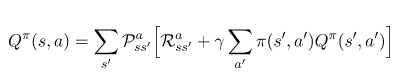

***
## Reinforcement Learning Algorithms

an interesting link : **https://github.com/udacity/deep-reinforcement-learning/blob/master/cheatsheet/cheatsheet.pdf**

Given the **q*** action value function, it's possible to find the best policy by choosing for each state the action that give the best return.

So, the main idea is to find this **q*** by interacting with the environment and getting feedback depending on the action choosen. **An eposide** is a succession of action from a starting state to a final state. (In the quarto example, an episode correspond to a game)

**First visit vs Every visit** algorithm (see the link above)

### Greedy Policy

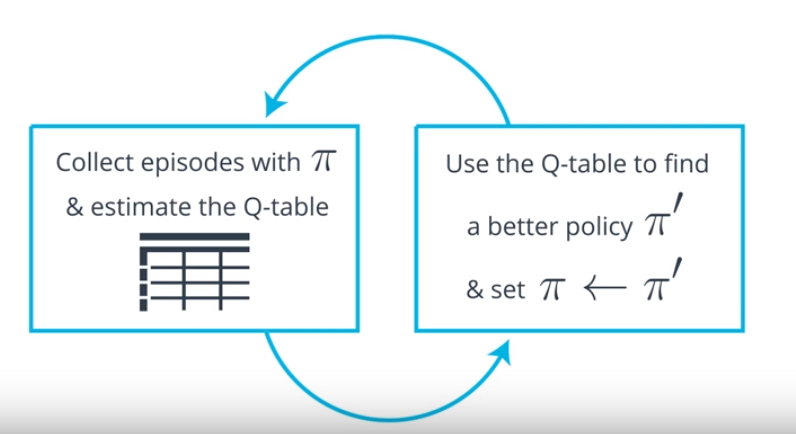

(source from Udacity)

### Epsilon Greedy Policy

The epsilon greedy policy is nearly the same as the greedy policy.

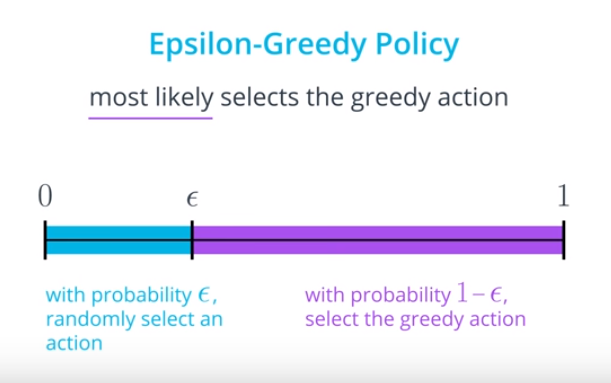

(source from Udacity)

### Exploration vs Exploitation
Depending on the value of epsilon, we are more in on exploration trend or an exploitation one. With an epsilon value equal to one, we are in an **exploration** "process". With a value close to zero, we are in an **exploitation** "process". In order to converge, the epsilon value should decay to a small positive number.


## Temporal-Difference Methods
The main difference with these methods is that we **do not wait for the end of an episode to update the Q-table**. The Q-table is updated after every time step.

Here is a [link](https://github.com/udacity/deep-reinforcement-learning/blob/master/cheatsheet/cheatsheet.pdf) to have more details on Sarsa, Q-learning (Sarsamax) and Expected Sarsa algorithms.

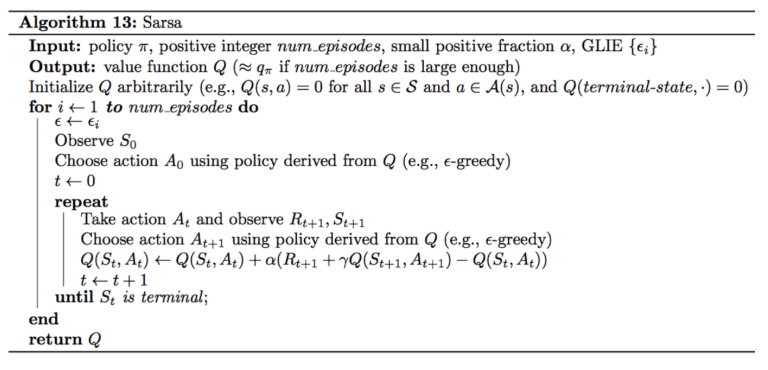

Sarsa and Expected Sarsa are **on-policy** TD control methods. Q-learning is an **off_policy** TD control methods. 